<a href="https://colab.research.google.com/github/sahokk/Assignments/blob/main/%E7%94%BB%E5%83%8F%E9%9F%B3%E5%A3%B0%E8%AA%8D%E8%AD%98_20220425.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##課題1-3

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math
import sys
from PIL import Image
from google.colab import files
from google.colab.patches import cv2_imshow

In [ ]:
uploaded = files.upload()
img = cv2.imread('kotori.jpg', cv2.IMREAD_UNCHANGED)
fig = plt.figure(dpi=100, figsize=(8,8))

Saving kotori.jpg to kotori.jpg


<Figure size 800x800 with 0 Axes>

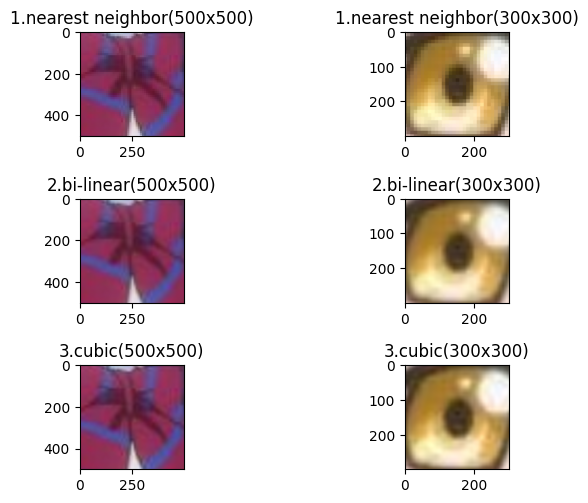

In [ ]:
def affine(src,af,interp):
    height,width = src.shape[0:2]
    a,b,c,d,e,f=af[0][0],af[0][1],af[1][0],af[1][1],af[0][2],af[1][2]

    maxx = (int)(max([a*width+e,b*height+e,a*width+b*height+e,e]))
    maxy = (int)(max([c*width+f,d*height+f,c*width+d*height+f,f]))

    dst = cv2.warpAffine(src, af, (maxx,maxy),flags=interp)
    return dst

img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
fig = plt.figure(dpi=100, figsize=(8,8))


#1 nearest neighbor
af =np.array([[10.0,0.0,0.0],[0.0,10.0,0.0]])
dst = affine(img,af,cv2.INTER_NEAREST)
dst_trim = dst[2600:3100, 3000:3500]
ax = fig.add_subplot(4,2,3)
ax.set_title("1.nearest neighbor(500x500)", loc='center')
plt.imshow(dst_trim)

dst_trim = dst[900:1200, 2600:2900]
ax = fig.add_subplot(4,2,4)
ax.set_title("1.nearest neighbor(300x300)", loc='center')
plt.imshow(dst_trim)

#2 bi-linear
af =np.array([[10.0,0.0,0.0],[0.0,10.0,0.0]])
dst = affine(img,af,cv2.INTER_LINEAR)
dst_trim = dst[2600:3100, 3000:3500]
ax = fig.add_subplot(4,2,5)
ax.set_title("2.bi-linear(500x500)", loc='center')
plt.imshow(dst_trim)

dst_trim = dst[900:1200, 2600:2900]
ax = fig.add_subplot(4,2,6)
ax.set_title("2.bi-linear(300x300)", loc='center')
plt.imshow(dst_trim)

#3 cubic
af =np.array([[10.0,0.0,0.0],[0.0,10.0,0.0]])
dst = affine(img,af,cv2.INTER_CUBIC)
dst_trim = dst[2600:3100, 3000:3500]
ax = fig.add_subplot(4,2,7)
ax.set_title("3.cubic(500x500)", loc='center')
plt.imshow(dst_trim)

dst_trim = dst[900:1200, 2600:2900]
ax = fig.add_subplot(4,2,8)
ax.set_title("3.cubic(300x300)", loc='center')
plt.imshow(dst_trim)

plt.subplots_adjust(wspace=0.1, hspace=0.6)
plt.show()
